## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  56.245945   391.384323  0.523802  3.311274  1.448748
1  83.186955   251.731584  0.223521  4.773517  0.524928
2  95.831317   775.410831  0.855772  7.125144  1.428718
3  24.059270  1061.295546  0.358698  1.168915  1.492153
4  64.663902   652.245652  0.812766  6.907799  1.432975


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.20844 | train_mse: 4.2876  | train_mae: 1.53981 |  0:00:00s


epoch 1  | loss: 1.18771 | train_mse: 3.49452 | train_mae: 1.39977 |  0:00:00s


epoch 2  | loss: 1.32408 | train_mse: 2.98285 | train_mae: 1.30866 |  0:00:01s


epoch 3  | loss: 1.09192 | train_mse: 2.6322  | train_mae: 1.23755 |  0:00:01s


epoch 4  | loss: 1.06597 | train_mse: 2.26301 | train_mae: 1.14018 |  0:00:01s


epoch 5  | loss: 1.04845 | train_mse: 2.06355 | train_mae: 1.0772  |  0:00:02s


epoch 6  | loss: 0.95125 | train_mse: 1.95455 | train_mae: 1.0357  |  0:00:02s


epoch 7  | loss: 0.88696 | train_mse: 1.75616 | train_mae: 0.99509 |  0:00:02s


epoch 8  | loss: 0.81222 | train_mse: 1.60597 | train_mae: 0.95548 |  0:00:03s


epoch 9  | loss: 0.75057 | train_mse: 1.34225 | train_mae: 0.87785 |  0:00:03s


epoch 10 | loss: 0.75453 | train_mse: 1.2585  | train_mae: 0.85384 |  0:00:03s


epoch 11 | loss: 0.74232 | train_mse: 1.17249 | train_mae: 0.8191  |  0:00:04s


epoch 12 | loss: 0.66025 | train_mse: 1.09966 | train_mae: 0.79486 |  0:00:04s
epoch 13 | loss: 0.77143 | train_mse: 1.02759 | train_mae: 0.76611 |  0:00:04s


epoch 14 | loss: 0.78839 | train_mse: 0.94063 | train_mae: 0.73803 |  0:00:04s


epoch 15 | loss: 0.60138 | train_mse: 0.85528 | train_mae: 0.70734 |  0:00:05s


epoch 16 | loss: 0.75747 | train_mse: 0.78205 | train_mae: 0.67706 |  0:00:05s
epoch 17 | loss: 0.62092 | train_mse: 0.70079 | train_mae: 0.63629 |  0:00:05s


epoch 18 | loss: 0.63439 | train_mse: 0.65432 | train_mae: 0.60841 |  0:00:06s


epoch 19 | loss: 0.51897 | train_mse: 0.61908 | train_mae: 0.5836  |  0:00:06s


epoch 20 | loss: 0.54108 | train_mse: 0.57616 | train_mae: 0.55543 |  0:00:06s
epoch 21 | loss: 0.61281 | train_mse: 0.54406 | train_mae: 0.53497 |  0:00:06s


epoch 22 | loss: 0.60379 | train_mse: 0.52709 | train_mae: 0.52478 |  0:00:07s
epoch 23 | loss: 0.67701 | train_mse: 0.50316 | train_mae: 0.51062 |  0:00:07s


epoch 24 | loss: 0.54023 | train_mse: 0.49179 | train_mae: 0.50401 |  0:00:08s


epoch 25 | loss: 0.5429  | train_mse: 0.47673 | train_mae: 0.49395 |  0:00:09s


epoch 26 | loss: 0.45013 | train_mse: 0.46446 | train_mae: 0.48501 |  0:00:09s


epoch 27 | loss: 0.49551 | train_mse: 0.45385 | train_mae: 0.4777  |  0:00:10s


epoch 28 | loss: 0.41903 | train_mse: 0.44509 | train_mae: 0.47023 |  0:00:11s


epoch 29 | loss: 0.50715 | train_mse: 0.42983 | train_mae: 0.45909 |  0:00:11s


epoch 30 | loss: 0.40172 | train_mse: 0.41112 | train_mae: 0.44636 |  0:00:12s


epoch 31 | loss: 0.43271 | train_mse: 0.39887 | train_mae: 0.43915 |  0:00:13s


epoch 32 | loss: 0.4819  | train_mse: 0.38754 | train_mae: 0.43148 |  0:00:13s


epoch 33 | loss: 0.52817 | train_mse: 0.37937 | train_mae: 0.42561 |  0:00:13s


epoch 34 | loss: 0.40372 | train_mse: 0.37239 | train_mae: 0.42131 |  0:00:14s


epoch 35 | loss: 0.53762 | train_mse: 0.37031 | train_mae: 0.4214  |  0:00:14s
epoch 36 | loss: 0.44369 | train_mse: 0.36581 | train_mae: 0.41867 |  0:00:14s


epoch 37 | loss: 0.38224 | train_mse: 0.35916 | train_mae: 0.41432 |  0:00:15s
epoch 38 | loss: 0.46963 | train_mse: 0.35676 | train_mae: 0.41095 |  0:00:15s


epoch 39 | loss: 0.34692 | train_mse: 0.35396 | train_mae: 0.40405 |  0:00:15s
epoch 40 | loss: 0.51364 | train_mse: 0.33755 | train_mae: 0.39245 |  0:00:15s


epoch 41 | loss: 0.37206 | train_mse: 0.32595 | train_mae: 0.3853  |  0:00:15s
epoch 42 | loss: 0.44124 | train_mse: 0.31616 | train_mae: 0.37876 |  0:00:15s


epoch 43 | loss: 0.34715 | train_mse: 0.30932 | train_mae: 0.3765  |  0:00:16s


epoch 44 | loss: 0.33715 | train_mse: 0.30167 | train_mae: 0.37312 |  0:00:16s
epoch 45 | loss: 0.37031 | train_mse: 0.29252 | train_mae: 0.36728 |  0:00:16s


epoch 46 | loss: 0.33555 | train_mse: 0.28457 | train_mae: 0.3624  |  0:00:16s
epoch 47 | loss: 0.48945 | train_mse: 0.27785 | train_mae: 0.35941 |  0:00:16s


epoch 48 | loss: 0.42938 | train_mse: 0.27343 | train_mae: 0.35567 |  0:00:16s
epoch 49 | loss: 0.33019 | train_mse: 0.26962 | train_mae: 0.35137 |  0:00:17s
epoch 50 | loss: 0.34827 | train_mse: 0.27102 | train_mae: 0.35222 |  0:00:17s


epoch 51 | loss: 0.33984 | train_mse: 0.27017 | train_mae: 0.3509  |  0:00:17s
epoch 52 | loss: 0.44543 | train_mse: 0.26579 | train_mae: 0.34815 |  0:00:17s
epoch 53 | loss: 0.31763 | train_mse: 0.26259 | train_mae: 0.34621 |  0:00:17s


epoch 54 | loss: 0.29992 | train_mse: 0.25665 | train_mae: 0.3408  |  0:00:17s
epoch 55 | loss: 0.25257 | train_mse: 0.24968 | train_mae: 0.33604 |  0:00:17s
epoch 56 | loss: 0.37289 | train_mse: 0.24648 | train_mae: 0.33093 |  0:00:17s


epoch 57 | loss: 0.28765 | train_mse: 0.24692 | train_mae: 0.32987 |  0:00:17s
epoch 58 | loss: 0.35099 | train_mse: 0.24476 | train_mae: 0.32705 |  0:00:17s
epoch 59 | loss: 0.40724 | train_mse: 0.24234 | train_mae: 0.32617 |  0:00:18s


epoch 60 | loss: 0.28442 | train_mse: 0.24153 | train_mae: 0.32474 |  0:00:18s
epoch 61 | loss: 0.35199 | train_mse: 0.24107 | train_mae: 0.32499 |  0:00:18s
epoch 62 | loss: 0.30194 | train_mse: 0.23817 | train_mae: 0.32003 |  0:00:18s


epoch 63 | loss: 0.35027 | train_mse: 0.23402 | train_mae: 0.31754 |  0:00:18s
epoch 64 | loss: 0.38018 | train_mse: 0.23158 | train_mae: 0.31863 |  0:00:18s


epoch 65 | loss: 0.36562 | train_mse: 0.22986 | train_mae: 0.31958 |  0:00:18s
epoch 66 | loss: 0.27112 | train_mse: 0.22694 | train_mae: 0.31901 |  0:00:18s


epoch 67 | loss: 0.57982 | train_mse: 0.22376 | train_mae: 0.31986 |  0:00:18s
epoch 68 | loss: 0.32507 | train_mse: 0.22461 | train_mae: 0.32058 |  0:00:18s
epoch 69 | loss: 0.37694 | train_mse: 0.22257 | train_mae: 0.31474 |  0:00:19s


epoch 70 | loss: 0.24825 | train_mse: 0.2262  | train_mae: 0.3167  |  0:00:19s
epoch 71 | loss: 0.40247 | train_mse: 0.22531 | train_mae: 0.31692 |  0:00:19s
epoch 72 | loss: 0.30825 | train_mse: 0.22213 | train_mae: 0.3131  |  0:00:19s


epoch 73 | loss: 0.41131 | train_mse: 0.22039 | train_mae: 0.30863 |  0:00:19s
epoch 74 | loss: 0.3078  | train_mse: 0.21564 | train_mae: 0.30382 |  0:00:19s
epoch 75 | loss: 0.38033 | train_mse: 0.21148 | train_mae: 0.30081 |  0:00:19s


epoch 76 | loss: 0.35108 | train_mse: 0.20925 | train_mae: 0.30121 |  0:00:19s
epoch 77 | loss: 0.46081 | train_mse: 0.21178 | train_mae: 0.30666 |  0:00:19s


epoch 78 | loss: 0.34777 | train_mse: 0.21101 | train_mae: 0.30753 |  0:00:19s
epoch 79 | loss: 0.28846 | train_mse: 0.20956 | train_mae: 0.30984 |  0:00:20s


epoch 80 | loss: 0.25455 | train_mse: 0.20687 | train_mae: 0.30805 |  0:00:20s
epoch 81 | loss: 0.34144 | train_mse: 0.20055 | train_mae: 0.30425 |  0:00:20s
epoch 82 | loss: 0.28476 | train_mse: 0.19539 | train_mae: 0.30245 |  0:00:20s


epoch 83 | loss: 0.39731 | train_mse: 0.19504 | train_mae: 0.30355 |  0:00:20s
epoch 84 | loss: 0.35728 | train_mse: 0.19506 | train_mae: 0.30885 |  0:00:20s
epoch 85 | loss: 0.31153 | train_mse: 0.19441 | train_mae: 0.31142 |  0:00:20s


epoch 86 | loss: 0.27561 | train_mse: 0.19647 | train_mae: 0.31164 |  0:00:20s
epoch 87 | loss: 0.23779 | train_mse: 0.19641 | train_mae: 0.31108 |  0:00:20s
epoch 88 | loss: 0.21381 | train_mse: 0.1948  | train_mae: 0.31101 |  0:00:20s


epoch 89 | loss: 0.31543 | train_mse: 0.18892 | train_mae: 0.30925 |  0:00:20s
epoch 90 | loss: 0.26661 | train_mse: 0.18154 | train_mae: 0.30469 |  0:00:21s
epoch 91 | loss: 0.18681 | train_mse: 0.17685 | train_mae: 0.30157 |  0:00:21s


epoch 92 | loss: 0.28325 | train_mse: 0.16674 | train_mae: 0.29848 |  0:00:21s
epoch 93 | loss: 0.25782 | train_mse: 0.15721 | train_mae: 0.29042 |  0:00:21s
epoch 94 | loss: 0.34087 | train_mse: 0.14988 | train_mae: 0.28332 |  0:00:21s


epoch 95 | loss: 0.26436 | train_mse: 0.14726 | train_mae: 0.28299 |  0:00:21s
epoch 96 | loss: 0.21942 | train_mse: 0.14442 | train_mae: 0.28546 |  0:00:21s
epoch 97 | loss: 0.43317 | train_mse: 0.14223 | train_mae: 0.28429 |  0:00:21s


epoch 98 | loss: 0.48669 | train_mse: 0.14012 | train_mae: 0.28252 |  0:00:21s
epoch 99 | loss: 0.30259 | train_mse: 0.13835 | train_mae: 0.28347 |  0:00:21s
epoch 100| loss: 0.36996 | train_mse: 0.13923 | train_mae: 0.28224 |  0:00:21s


epoch 101| loss: 0.26933 | train_mse: 0.14391 | train_mae: 0.28495 |  0:00:22s
epoch 102| loss: 0.26478 | train_mse: 0.14358 | train_mae: 0.28178 |  0:00:22s


epoch 103| loss: 0.20743 | train_mse: 0.14415 | train_mae: 0.28172 |  0:00:22s
epoch 104| loss: 0.29504 | train_mse: 0.14686 | train_mae: 0.28435 |  0:00:22s
epoch 105| loss: 0.51025 | train_mse: 0.15507 | train_mae: 0.28229 |  0:00:22s


epoch 106| loss: 0.32866 | train_mse: 0.16026 | train_mae: 0.28074 |  0:00:22s
epoch 107| loss: 0.2157  | train_mse: 0.16042 | train_mae: 0.28146 |  0:00:22s
epoch 108| loss: 0.15895 | train_mse: 0.15997 | train_mae: 0.28069 |  0:00:22s


epoch 109| loss: 0.27457 | train_mse: 0.15911 | train_mae: 0.27741 |  0:00:22s
epoch 110| loss: 0.15363 | train_mse: 0.15685 | train_mae: 0.27346 |  0:00:22s
epoch 111| loss: 0.26896 | train_mse: 0.15875 | train_mae: 0.27052 |  0:00:23s


epoch 112| loss: 0.14619 | train_mse: 0.1589  | train_mae: 0.27228 |  0:00:23s
epoch 113| loss: 0.36249 | train_mse: 0.15926 | train_mae: 0.27629 |  0:00:23s


epoch 114| loss: 0.23798 | train_mse: 0.15876 | train_mae: 0.28036 |  0:00:23s
epoch 115| loss: 0.26255 | train_mse: 0.15749 | train_mae: 0.28204 |  0:00:23s
epoch 116| loss: 0.26523 | train_mse: 0.1525  | train_mae: 0.28034 |  0:00:23s


epoch 117| loss: 0.24862 | train_mse: 0.14903 | train_mae: 0.27294 |  0:00:23s
epoch 118| loss: 0.27604 | train_mse: 0.1424  | train_mae: 0.26833 |  0:00:23s


epoch 119| loss: 0.3202  | train_mse: 0.13895 | train_mae: 0.26767 |  0:00:23s


epoch 120| loss: 0.25756 | train_mse: 0.13778 | train_mae: 0.26704 |  0:00:23s
epoch 121| loss: 0.18422 | train_mse: 0.13439 | train_mae: 0.26245 |  0:00:24s
epoch 122| loss: 0.22912 | train_mse: 0.13319 | train_mae: 0.26217 |  0:00:24s


epoch 123| loss: 0.14054 | train_mse: 0.13025 | train_mae: 0.25889 |  0:00:24s
epoch 124| loss: 0.15964 | train_mse: 0.12589 | train_mae: 0.25545 |  0:00:24s
epoch 125| loss: 0.13933 | train_mse: 0.11891 | train_mae: 0.25054 |  0:00:24s


epoch 126| loss: 0.21607 | train_mse: 0.11088 | train_mae: 0.24445 |  0:00:24s
epoch 127| loss: 0.16819 | train_mse: 0.10367 | train_mae: 0.24062 |  0:00:24s


epoch 128| loss: 0.16478 | train_mse: 0.09975 | train_mae: 0.23922 |  0:00:24s
epoch 129| loss: 0.24193 | train_mse: 0.092   | train_mae: 0.23378 |  0:00:25s


epoch 130| loss: 0.1729  | train_mse: 0.08893 | train_mae: 0.23303 |  0:00:25s
epoch 131| loss: 0.16423 | train_mse: 0.08944 | train_mae: 0.23694 |  0:00:25s


epoch 132| loss: 0.28367 | train_mse: 0.09217 | train_mae: 0.24262 |  0:00:25s
epoch 133| loss: 0.26217 | train_mse: 0.09122 | train_mae: 0.24172 |  0:00:25s


epoch 134| loss: 0.155   | train_mse: 0.08695 | train_mae: 0.23569 |  0:00:26s


epoch 135| loss: 0.28077 | train_mse: 0.08474 | train_mae: 0.232   |  0:00:26s
epoch 136| loss: 0.18639 | train_mse: 0.08407 | train_mae: 0.23158 |  0:00:26s


epoch 137| loss: 0.2068  | train_mse: 0.08085 | train_mae: 0.22746 |  0:00:26s
epoch 138| loss: 0.25046 | train_mse: 0.07945 | train_mae: 0.22605 |  0:00:26s


epoch 139| loss: 0.1389  | train_mse: 0.07554 | train_mae: 0.22274 |  0:00:26s
epoch 140| loss: 0.13583 | train_mse: 0.07142 | train_mae: 0.21562 |  0:00:27s


epoch 141| loss: 0.22815 | train_mse: 0.07016 | train_mae: 0.21533 |  0:00:27s
epoch 142| loss: 0.23112 | train_mse: 0.06936 | train_mae: 0.21062 |  0:00:27s


epoch 143| loss: 0.3269  | train_mse: 0.06938 | train_mae: 0.21127 |  0:00:27s
epoch 144| loss: 0.34262 | train_mse: 0.06864 | train_mae: 0.21126 |  0:00:27s
epoch 145| loss: 0.21539 | train_mse: 0.06866 | train_mae: 0.21183 |  0:00:27s


epoch 146| loss: 0.3036  | train_mse: 0.06996 | train_mae: 0.21436 |  0:00:27s
epoch 147| loss: 0.29276 | train_mse: 0.07055 | train_mae: 0.21603 |  0:00:27s


epoch 148| loss: 0.1992  | train_mse: 0.07165 | train_mae: 0.2182  |  0:00:27s
epoch 149| loss: 0.10528 | train_mse: 0.07243 | train_mae: 0.21856 |  0:00:27s
epoch 150| loss: 0.20762 | train_mse: 0.07129 | train_mae: 0.21664 |  0:00:28s


epoch 151| loss: 0.24187 | train_mse: 0.07171 | train_mae: 0.21628 |  0:00:28s
epoch 152| loss: 0.1058  | train_mse: 0.07325 | train_mae: 0.21863 |  0:00:28s
epoch 153| loss: 0.22604 | train_mse: 0.07287 | train_mae: 0.21719 |  0:00:28s


epoch 154| loss: 0.17435 | train_mse: 0.07174 | train_mae: 0.2166  |  0:00:28s
epoch 155| loss: 0.32703 | train_mse: 0.07147 | train_mae: 0.21561 |  0:00:28s
epoch 156| loss: 0.15101 | train_mse: 0.07313 | train_mae: 0.21725 |  0:00:28s


epoch 157| loss: 0.12402 | train_mse: 0.07399 | train_mae: 0.21877 |  0:00:28s
epoch 158| loss: 0.20569 | train_mse: 0.07635 | train_mae: 0.22396 |  0:00:28s


epoch 159| loss: 0.20245 | train_mse: 0.07966 | train_mae: 0.22786 |  0:00:28s
epoch 160| loss: 0.17294 | train_mse: 0.07947 | train_mae: 0.22931 |  0:00:28s
epoch 161| loss: 0.16446 | train_mse: 0.07902 | train_mae: 0.22828 |  0:00:28s


epoch 162| loss: 0.34057 | train_mse: 0.07619 | train_mae: 0.22241 |  0:00:29s
epoch 163| loss: 0.15931 | train_mse: 0.07488 | train_mae: 0.22029 |  0:00:29s
epoch 164| loss: 0.17967 | train_mse: 0.07558 | train_mae: 0.22251 |  0:00:29s


epoch 165| loss: 0.09518 | train_mse: 0.07724 | train_mae: 0.22411 |  0:00:29s
epoch 166| loss: 0.1136  | train_mse: 0.07963 | train_mae: 0.22466 |  0:00:29s
epoch 167| loss: 0.1444  | train_mse: 0.07983 | train_mae: 0.2229  |  0:00:29s


epoch 168| loss: 0.1456  | train_mse: 0.07585 | train_mae: 0.21628 |  0:00:29s
epoch 169| loss: 0.1719  | train_mse: 0.07365 | train_mae: 0.21345 |  0:00:29s


epoch 170| loss: 0.23799 | train_mse: 0.07065 | train_mae: 0.21051 |  0:00:29s
epoch 171| loss: 0.18784 | train_mse: 0.07026 | train_mae: 0.21128 |  0:00:29s
epoch 172| loss: 0.12574 | train_mse: 0.07057 | train_mae: 0.21119 |  0:00:30s


epoch 173| loss: 0.19698 | train_mse: 0.06945 | train_mae: 0.20916 |  0:00:30s
epoch 174| loss: 0.22147 | train_mse: 0.06836 | train_mae: 0.20621 |  0:00:30s
epoch 175| loss: 0.29195 | train_mse: 0.06915 | train_mae: 0.20763 |  0:00:30s


epoch 176| loss: 0.17549 | train_mse: 0.06918 | train_mae: 0.20644 |  0:00:30s
epoch 177| loss: 0.20147 | train_mse: 0.0702  | train_mae: 0.20584 |  0:00:30s
epoch 178| loss: 0.26602 | train_mse: 0.07186 | train_mae: 0.20807 |  0:00:30s


epoch 179| loss: 0.14706 | train_mse: 0.07449 | train_mae: 0.21198 |  0:00:30s
epoch 180| loss: 0.09871 | train_mse: 0.07623 | train_mae: 0.21365 |  0:00:30s


epoch 181| loss: 0.13877 | train_mse: 0.07636 | train_mae: 0.21454 |  0:00:30s
epoch 182| loss: 0.14331 | train_mse: 0.07479 | train_mae: 0.21387 |  0:00:31s


epoch 183| loss: 0.15272 | train_mse: 0.07142 | train_mae: 0.20993 |  0:00:31s
epoch 184| loss: 0.1899  | train_mse: 0.0684  | train_mae: 0.20698 |  0:00:31s
epoch 185| loss: 0.17129 | train_mse: 0.06363 | train_mae: 0.20056 |  0:00:31s


epoch 186| loss: 0.1175  | train_mse: 0.06145 | train_mae: 0.19712 |  0:00:31s
epoch 187| loss: 0.16599 | train_mse: 0.05912 | train_mae: 0.19332 |  0:00:31s
epoch 188| loss: 0.08319 | train_mse: 0.05768 | train_mae: 0.19034 |  0:00:31s


epoch 189| loss: 0.15234 | train_mse: 0.05618 | train_mae: 0.18813 |  0:00:31s
epoch 190| loss: 0.49678 | train_mse: 0.05784 | train_mae: 0.19278 |  0:00:31s
epoch 191| loss: 0.15787 | train_mse: 0.05744 | train_mae: 0.19313 |  0:00:32s


epoch 192| loss: 0.11535 | train_mse: 0.05795 | train_mae: 0.19557 |  0:00:32s
epoch 193| loss: 0.15634 | train_mse: 0.06039 | train_mae: 0.20042 |  0:00:32s
epoch 194| loss: 0.18612 | train_mse: 0.06265 | train_mae: 0.19997 |  0:00:32s


epoch 195| loss: 0.15242 | train_mse: 0.06438 | train_mae: 0.20154 |  0:00:32s
epoch 196| loss: 0.11793 | train_mse: 0.06486 | train_mae: 0.20219 |  0:00:32s
epoch 197| loss: 0.23348 | train_mse: 0.06457 | train_mae: 0.2025  |  0:00:32s


epoch 198| loss: 0.15518 | train_mse: 0.06529 | train_mae: 0.20645 |  0:00:32s
epoch 199| loss: 0.20376 | train_mse: 0.06559 | train_mae: 0.20605 |  0:00:32s


epoch 200| loss: 0.14188 | train_mse: 0.06686 | train_mae: 0.20608 |  0:00:32s
epoch 201| loss: 0.15786 | train_mse: 0.06644 | train_mae: 0.20671 |  0:00:32s
epoch 202| loss: 0.14349 | train_mse: 0.06645 | train_mae: 0.20873 |  0:00:33s


epoch 203| loss: 0.14318 | train_mse: 0.06697 | train_mae: 0.20892 |  0:00:33s
epoch 204| loss: 0.13338 | train_mse: 0.06455 | train_mae: 0.20446 |  0:00:33s
epoch 205| loss: 0.20179 | train_mse: 0.0662  | train_mae: 0.20467 |  0:00:33s


epoch 206| loss: 0.12629 | train_mse: 0.06771 | train_mae: 0.20544 |  0:00:33s
epoch 207| loss: 0.13294 | train_mse: 0.07049 | train_mae: 0.20908 |  0:00:33s
epoch 208| loss: 0.13127 | train_mse: 0.07088 | train_mae: 0.20939 |  0:00:33s


epoch 209| loss: 0.15114 | train_mse: 0.07314 | train_mae: 0.21206 |  0:00:33s
epoch 210| loss: 0.10698 | train_mse: 0.07117 | train_mae: 0.20841 |  0:00:33s


epoch 211| loss: 0.10802 | train_mse: 0.06827 | train_mae: 0.20543 |  0:00:33s
epoch 212| loss: 0.11981 | train_mse: 0.0674  | train_mae: 0.20403 |  0:00:33s
epoch 213| loss: 0.13764 | train_mse: 0.06562 | train_mae: 0.20096 |  0:00:34s


epoch 214| loss: 0.21706 | train_mse: 0.06431 | train_mae: 0.20006 |  0:00:34s
epoch 215| loss: 0.14222 | train_mse: 0.06301 | train_mae: 0.19685 |  0:00:34s
epoch 216| loss: 0.22445 | train_mse: 0.06023 | train_mae: 0.19269 |  0:00:34s


epoch 217| loss: 0.21218 | train_mse: 0.05892 | train_mae: 0.19069 |  0:00:34s
epoch 218| loss: 0.16346 | train_mse: 0.05738 | train_mae: 0.18632 |  0:00:34s
epoch 219| loss: 0.13971 | train_mse: 0.05745 | train_mae: 0.18656 |  0:00:34s


epoch 220| loss: 0.11718 | train_mse: 0.05658 | train_mae: 0.18535 |  0:00:34s
epoch 221| loss: 0.13045 | train_mse: 0.05775 | train_mae: 0.18606 |  0:00:34s
epoch 222| loss: 0.13204 | train_mse: 0.05803 | train_mae: 0.18867 |  0:00:34s


epoch 223| loss: 0.12673 | train_mse: 0.0591  | train_mae: 0.1911  |  0:00:35s
epoch 224| loss: 0.15703 | train_mse: 0.06021 | train_mae: 0.19291 |  0:00:35s
epoch 225| loss: 0.11127 | train_mse: 0.05948 | train_mae: 0.19238 |  0:00:35s


epoch 226| loss: 0.16885 | train_mse: 0.05762 | train_mae: 0.19012 |  0:00:35s
epoch 227| loss: 0.18621 | train_mse: 0.05648 | train_mae: 0.18708 |  0:00:35s
epoch 228| loss: 0.22846 | train_mse: 0.05861 | train_mae: 0.19163 |  0:00:35s


epoch 229| loss: 0.15836 | train_mse: 0.05685 | train_mae: 0.19098 |  0:00:35s
epoch 230| loss: 0.17403 | train_mse: 0.05769 | train_mae: 0.19314 |  0:00:35s
epoch 231| loss: 0.15075 | train_mse: 0.05881 | train_mae: 0.19534 |  0:00:35s


epoch 232| loss: 0.16443 | train_mse: 0.061   | train_mae: 0.19931 |  0:00:35s
epoch 233| loss: 0.08001 | train_mse: 0.07615 | train_mae: 0.20855 |  0:00:35s
epoch 234| loss: 0.15856 | train_mse: 0.08017 | train_mae: 0.21284 |  0:00:35s


epoch 235| loss: 0.16746 | train_mse: 0.07539 | train_mae: 0.20881 |  0:00:36s
epoch 236| loss: 0.12606 | train_mse: 0.08048 | train_mae: 0.21329 |  0:00:36s
epoch 237| loss: 0.29063 | train_mse: 0.07989 | train_mae: 0.21115 |  0:00:36s


epoch 238| loss: 0.24044 | train_mse: 0.07648 | train_mae: 0.20649 |  0:00:36s
epoch 239| loss: 0.17362 | train_mse: 0.06114 | train_mae: 0.195   |  0:00:36s
epoch 240| loss: 0.08626 | train_mse: 0.06573 | train_mae: 0.19976 |  0:00:36s


epoch 241| loss: 0.14065 | train_mse: 0.06177 | train_mae: 0.19663 |  0:00:36s
epoch 242| loss: 0.12865 | train_mse: 0.06093 | train_mae: 0.19786 |  0:00:36s
epoch 243| loss: 0.10865 | train_mse: 0.05861 | train_mae: 0.19292 |  0:00:36s


epoch 244| loss: 0.11509 | train_mse: 0.05909 | train_mae: 0.19383 |  0:00:36s
epoch 245| loss: 0.17301 | train_mse: 0.06045 | train_mae: 0.19539 |  0:00:36s
epoch 246| loss: 0.25903 | train_mse: 0.06123 | train_mae: 0.19616 |  0:00:37s


epoch 247| loss: 0.08833 | train_mse: 0.07866 | train_mae: 0.20897 |  0:00:37s
epoch 248| loss: 0.09409 | train_mse: 0.07666 | train_mae: 0.2095  |  0:00:37s
epoch 249| loss: 0.12732 | train_mse: 0.07577 | train_mae: 0.20957 |  0:00:37s


epoch 250| loss: 0.15524 | train_mse: 0.07674 | train_mae: 0.21155 |  0:00:37s
epoch 251| loss: 0.12431 | train_mse: 0.07889 | train_mae: 0.21464 |  0:00:37s
epoch 252| loss: 0.14806 | train_mse: 0.08115 | train_mae: 0.21806 |  0:00:37s


epoch 253| loss: 0.2019  | train_mse: 0.08721 | train_mae: 0.22589 |  0:00:37s
epoch 254| loss: 0.14262 | train_mse: 0.08507 | train_mae: 0.22539 |  0:00:37s


epoch 255| loss: 0.1258  | train_mse: 0.08357 | train_mae: 0.2266  |  0:00:37s
epoch 256| loss: 0.14942 | train_mse: 0.07868 | train_mae: 0.22322 |  0:00:37s
epoch 257| loss: 0.10209 | train_mse: 0.07426 | train_mae: 0.21722 |  0:00:37s


epoch 258| loss: 0.10773 | train_mse: 0.06988 | train_mae: 0.20916 |  0:00:38s
epoch 259| loss: 0.12922 | train_mse: 0.07    | train_mae: 0.2104  |  0:00:38s
epoch 260| loss: 0.12222 | train_mse: 0.06912 | train_mae: 0.20791 |  0:00:38s


epoch 261| loss: 0.14326 | train_mse: 0.06843 | train_mae: 0.20626 |  0:00:38s
epoch 262| loss: 0.10468 | train_mse: 0.06846 | train_mae: 0.20495 |  0:00:38s
epoch 263| loss: 0.17379 | train_mse: 0.06841 | train_mae: 0.20248 |  0:00:38s


epoch 264| loss: 0.19679 | train_mse: 0.06712 | train_mae: 0.2     |  0:00:38s
epoch 265| loss: 0.13013 | train_mse: 0.06693 | train_mae: 0.20085 |  0:00:38s
epoch 266| loss: 0.15699 | train_mse: 0.06595 | train_mae: 0.19924 |  0:00:38s


epoch 267| loss: 0.1869  | train_mse: 0.06677 | train_mae: 0.20107 |  0:00:38s
epoch 268| loss: 0.1496  | train_mse: 0.06642 | train_mae: 0.19916 |  0:00:38s
epoch 269| loss: 0.10368 | train_mse: 0.0698  | train_mae: 0.2049  |  0:00:39s


epoch 270| loss: 0.15842 | train_mse: 0.06925 | train_mae: 0.20396 |  0:00:39s

Early stopping occurred at epoch 270 with best_epoch = 220 and best_train_mae = 0.18535
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.5126180926744037


ABC Pre-generator MAE 0.8689695564265408


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

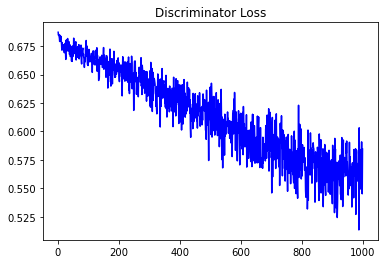

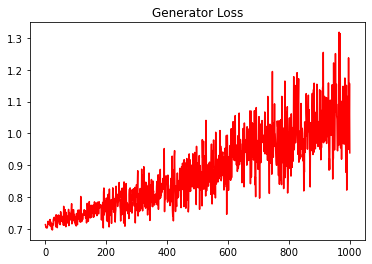

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5906603853702546


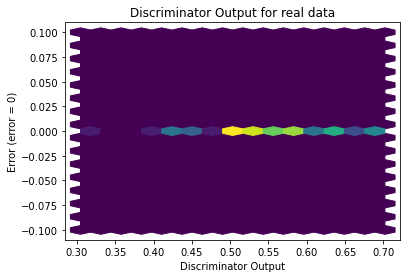

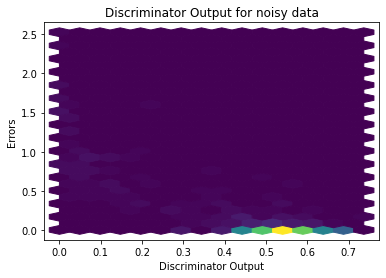

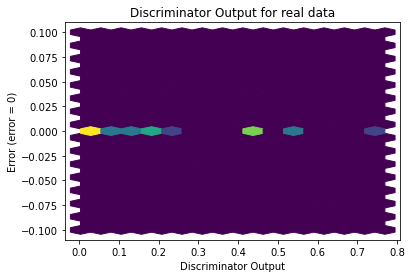

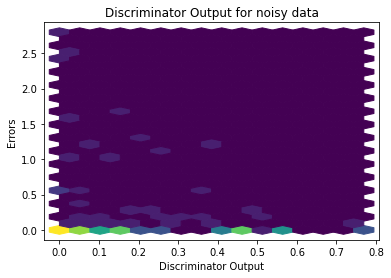

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


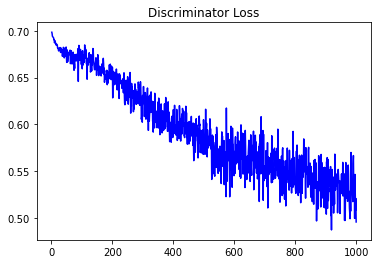

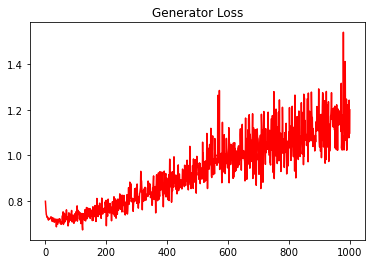

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.6417035373817198


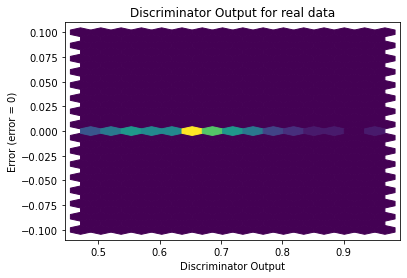

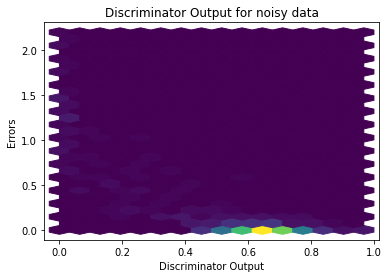

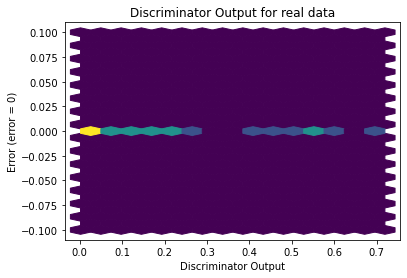

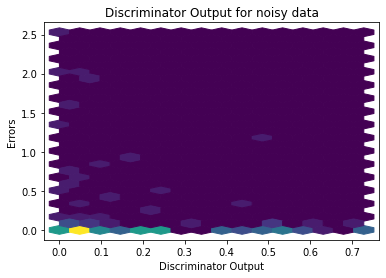

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7565]], requires_grad=True)
